In [90]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [91]:
# Drop the non-beneficial ID column 'EIN' 
app_df_cleaned = application_df.drop(columns=['EIN'])
app_df_cleaned.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [92]:
# Determine the number of unique values in each column.
app_df_cleaned.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [121]:
# Look at lower unique value counts for binning (Organization with 4 unique values)
organization_counts = app_df_cleaned['ORGANIZATION'].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [122]:
# Look at lower unique value counts for binning (Status with 2 unique values)
status_counts = app_df_cleaned['STATUS'].value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [123]:
# Look at lower unique value counts for binning (special considerations with 2 unique values)
special_consid_counts = app_df_cleaned['SPECIAL_CONSIDERATIONS'].value_counts()
special_consid_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [124]:
# Drop additonal columns
app_df_cleaned_2 = app_df_cleaned.drop(columns=['STATUS', 'SPECIAL_CONSIDERATIONS', 'ORGANIZATION'])
app_df_cleaned_2.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,100000-499999,142590,1


In [125]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = app_df_cleaned_2['APPLICATION_TYPE'].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [126]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace =  list(app_type_counts[app_type_counts < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    app_df_cleaned_2['APPLICATION_TYPE'] = app_df_cleaned_2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
app_df_cleaned_2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [127]:
# Look at CLASSIFICATION value counts for binning
classification_counts = app_df_cleaned_2['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [128]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [129]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 700].index)

# Replace in dataframe
for cls in classifications_to_replace:
    app_df_cleaned_2['CLASSIFICATION'] = app_df_cleaned_2['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_df_cleaned_2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [130]:
# Look at NAME value counts for binning
name_counts = app_df_cleaned_2['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [132]:
# Look at NAME value counts > 10
name_counts[name_counts > 10]

PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
                                                                          ... 
USA SWIMMING INC                                                            11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                    11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER      11
SONS OF ITALY IN AMERICA                                                    11
FELLOWSHIP OF CHRISTIAN COWBOYS INC                                         11
Name: NAME, Length: 204, dtype: int64

In [133]:
# Choose a cutoff value and create a list of names to be replaced
# use the variable name `names_to_replace`
names_to_replace = list(name_counts[name_counts < 11].index)

# Replace in dataframe
for name in names_to_replace:
    app_df_cleaned_2['NAME'] = app_df_cleaned_2['NAME'].replace(name,"Other")
    
# Check to make sure binning was successful
app_df_cleaned_2['NAME'].value_counts()

Other                                                                     21202
PARENT BOOSTER USA INC                                                     1260
TOPS CLUB INC                                                               765
UNITED STATES BOWLING CONGRESS INC                                          700
WASHINGTON STATE UNIVERSITY                                                 492
                                                                          ...  
AMERICAN POSTAL WORKERS UNION                                                11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER       11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                     11
FINANCIAL PLANNING ASSOCIATION                                               11
SLOW FOOD U S A INC                                                          11
Name: NAME, Length: 205, dtype: int64

In [134]:
# Convert categorical data to numeric with `pd.get_dummies`
app_df_cleaned_2 = pd.get_dummies(app_df_cleaned_2)
app_df_cleaned_2.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,USE_CASE_ProductDev,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [135]:
# Split our preprocessed data into our features and target arrays
X = app_df_cleaned_2.drop(columns=['IS_SUCCESSFUL']).values
y = app_df_cleaned_2['IS_SUCCESSFUL'].values


In [136]:
# View data
X[:10]

array([[   5000,       0,       0, ...,       0,       0,       0],
       [ 108590,       0,       0, ...,       0,       0,       0],
       [   5000,       0,       0, ...,       0,       0,       0],
       ...,
       [7508025,       0,       0, ...,       0,       0,       0],
       [  94389,       0,       0, ...,       0,       0,       0],
       [   5000,       0,       0, ...,       0,       0,       0]])

In [138]:
# View data
y[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [139]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [140]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [141]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  150
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 150)               36300     
                                                                 
 dense_21 (Dense)            (None, 30)                4530      
                                                                 
 dense_22 (Dense)            (None, 10)                310       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41,151
Trainable params: 41,151
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4741 - accuracy: 0.7714
Epoch 2/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4500 - accuracy: 0.7824
Epoch 3/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4462 - accuracy: 0.7845
Epoch 4/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4451 - accuracy: 0.7846
Epoch 5/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4433 - accuracy: 0.7868
Epoch 6/150
804/804 [==============================] - 4s 5ms/step - loss: 0.4424 - accuracy: 0.7860
Epoch 7/150
804/804 [==============================] - 5s 6ms/step - loss: 0.4417 - accuracy: 0.7868
Epoch 8/150
804/804 [==============================] - 4s 5ms/step - loss: 0.4411 - accuracy: 0.7880
Epoch 9/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4404 - accuracy: 0.7875
Epoch 10/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4398 - accura

In [145]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4883 - accuracy: 0.7812 - 489ms/epoch - 2ms/step
Loss: 0.48831918835639954, Accuracy: 0.7812244892120361


In [146]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

<Axes: title={'center': 'Epoch Accuracy Tracker'}, xlabel='Epoch Count', ylabel='Accuracy'>

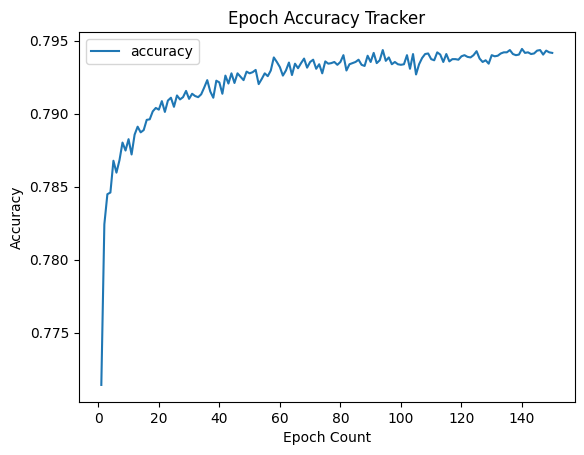

In [147]:
# View plot of accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1,len(fit_model.history['loss'])+1))
accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y='accuracy', title='Epoch Accuracy Tracker')